# 1.3: Frequentist statistics 101

<img src="http://cdn.quotationof.com/images/ronald-fishers-quotes-5.jpg">

## "Bayesian" vs. "Frequentist"

If you haven't been hearing all the hype about the return of "Bayesian methods" to statistics and data science, then you have probably been living under a rock. But what is this referring to, really?

There are two big "camps" in statistics: **Frequentist** and **Bayesian**. I will get to the essential differences, but it is important to remember the overarching goal of both:

---

**As statisticians we want to make a statement about ALL data points based on a SAMPLE of data points, and describe our UNCERTAINTY about that statement.**

---

### Estimating a mean value

Say we want to measure the **mean height of 25 year old San Francisco males**. We measure the height of 100 different 25 year old males and thus have 100 data points in our sample.

Our scenario:

- We want to make a statement about the mean height of **ALL** 25 year old San Francisco males.
- We have a **sample** of 100 measured heights from that **population**.

### Estimating the mean height from a Bayesian approach...

As a **Bayesian** I believe:

- The mean height of 25 year old San Francisco males is indeed a value, but it is drawn from a **prior probability distribution** of 25 year old San Francisco male heights.

- I have 100 observations, or data points, that I will use to **update** this "prior" belief about heights.

- I have collected **fixed data** which I use to update my inference of the probability for the mean height, which is called my **posterior distribution** of mean heights.

### Estimating the mean height from a Frequentist approach...

As a **Frequentist** I believe:

- The mean height of 25 year old San Francisco males is an unknown but **fixed, "true" value**.

- My 100 data points are considered to be a **random sample.** That is to say, I have collected **at random** 100 heights from the **population pool**.

- This random sampling procedure is considered **infinitely repeatable**. My inferences about height are based on the idea that this sample is just one of an infinite number of potential population samples.

- Though the **data sampled is random**, the **true value of height is fixed** across samples.

### Pros and cons to both

Recent hype may have lead you to believe that Bayesian methods are definitively better than Frequetist, but the real truth is that there are pros and cons to both.

---

**Bayesian methods**:

- Pros: Inference on measure is more intuitive. No "absurd" results. Does not require "infinite sampling" theory.
- Cons: Computationally intensive. Does not "guarantee" success rate of experiments. Requires prior belief.

** Frequentist methods:**

- Pros: Requires no justification of prior belief. Direct analogy to experimental design theory. Not as computationally expensive.
- Cons: Inference not as intuitive. Requires "asymptotic" sampling axioms. Allows "absurd" results (it is ok if some of the "experiments" are nonsense as long as most are correct.)

## Hypothesis testing with frequentist methods

**Frequentist** methods lend themselves well to the idea of experimental design. For example, say we are testing a new drug:

- We randomly select 50 people to be in the placebo control condition and 50 people to recieve the treatment.
- Our sample is selected from the broader, unknown population pool.
- In a parallel world we could have ended up with any random sample from the population pool of 100 people.


### The "null hypothesis"

The **null hypothesis** is a fundamental concept for Frequentist statistics. We can define this as **H0**. The null hypothesis is, in this example, the hypothesis that there is no difference between placebo and treatment.

**H0:** The measured parameter is equal to a specific value for the population.

The **alternative hypothesis** is the other possible outcome of the experiment: the difference between the placebo and the treatment is real/not zero.

**H1:** The measured parameter is different for the population than the value in the null hypothesis.

### The p-value

The **p-value** is the probability that, **GIVEN THE NULL HYPOTHESIS IS TRUE**, we would have the current set of data. 

---

Say in our experiment we follow-up with the experimental and control groups:

- 5 out of 50 patients in the control group indicate that their symptoms are better
- 20 out of 50 patients in the experimental group indicate that their symptoms are better

The **p-value** would be the **probability we have this data if the effect of the drug is in fact no better than placebo.**

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize": (9, 7)})

null_dist = np.random.normal(0, 5, 100)
measured_diff = 15.

/Users/Stav/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


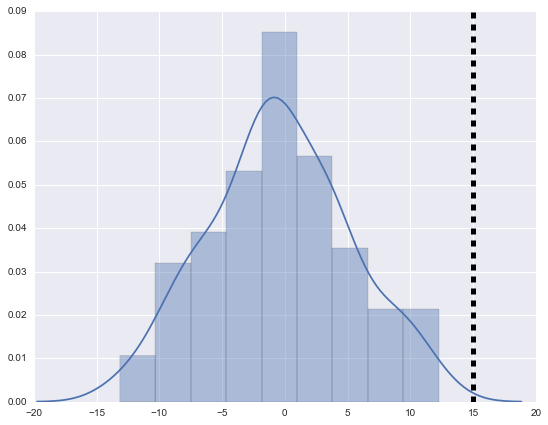

In [2]:
ax = sns.distplot(null_dist)
ax.axvline(measured_diff, color='k', linestyle='--', lw=5)

### t-tests: calculating the p-value

How do we calculate the **p-value**? For comparing two means (as is the case in this example: the mean difference in symptoms between conditions) we can use the **t-test**.

The p-value is a conversion of the **t-statistic** calculated for our experiment.

<img src="http://sites.nicholas.duke.edu/statsreview/files/2013/09/tstat.jpg">

<img src="http://sites.nicholas.duke.edu/statsreview/files/2013/09/tstat.jpg">

- The numerator: the difference between **the mean of your sample** and the **hypothesized mean**. Recall that our hypothesized mean is the **null hypothesis H0**

- The denominator: **the standard deviation of your sample measurements** divided by the **square root of your sample size**. 

### But what is the t-statistic?
<img src="http://sites.nicholas.duke.edu/statsreview/files/2013/09/tstat.jpg">

The t-statistic measures the **signal to noise ratio** in our data.

**The signal is our measured difference.** This is our measured mean minus the hypothesized mean **H0**.

**The noise** is the **variation in our data**. This is how much our measurements vary (measured by the standard deviation), with a penalty for smaller sample sizes (the square root of the sample size).

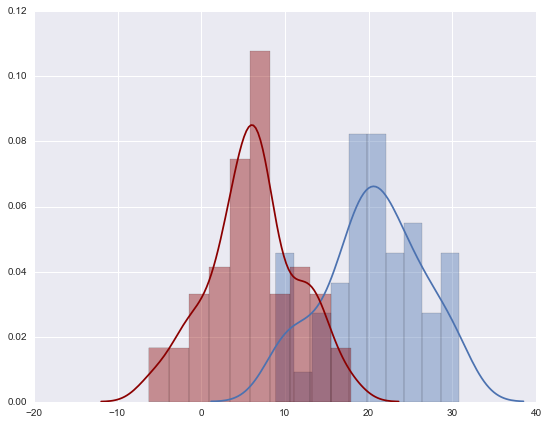

In [5]:
control = np.random.normal(20, 5, 50)
experimental = np.random.normal(5, 5, 50)

ax = sns.distplot(control, bins=10)
sns.distplot(experimental, color='darkred', bins=10, ax=ax)


We set the standard deviation to 5. What if it was higher? 

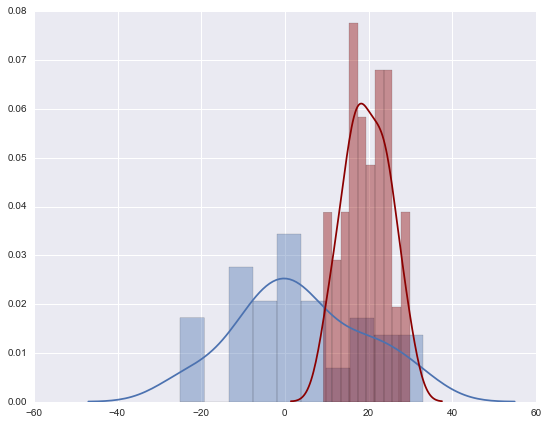

In [10]:
control = np.random.normal(5, 15, 50)
experimental = np.random.normal(20, 5, 50)

ax = sns.distplot(control, bins=10)
sns.distplot(experimental, color='darkred', bins=10, ax=ax)

## Confidence intervals

You may have heard of people describing "95% confidence intervals" in experiments measuring mean differences.

What do you think of this definition of confidence intervals:

**Def.1:** The 95% confidence interval around a mean indicates that there is a 95% chance the true mean falls in that interval.

### WRONG!

That is a **Bayesian** way of thinking (which is confusingly called "credible intervals"). The **Frequentist confidence interval** is defined as:

**Correct definition:** In 95% of experiments, an interval constructed with this threshold will contain the true mean.

### Bootstrapping the confidence interval

**Bootstrapping** is the procedure of **resampling your sample** to extract confidence intervals.

[Bootstrapping has other extended uses. We will talk about bootstrapping in depth later.]

Imagine we resample our sample 1000 times and each time calculate the mean. What can we use these values for?

---

**A:** Bootstrapped means can give us additional information about our **statistic of interest**. For example, the 2.5th percentile and 97.5th percentile can give us the 95% confidence interval for our statistic.

### Why does bootstrapping work?

This question is beyond the scope of this lecture, and potentially beyond the scope of our class (at least mathematically). 

However, there is a good intuition for the bootstrap.

---
The bootstrapping procedure is based on the same infinite sampling theory that Frequentist statistics leverages. Remember that taking a random sample of people and measuring them provides us the ability  to **infer information about the whole population.**

Likewise, **bootstrapping our statistic of interest lets us infer information _about the "population" of our measured statistic!**

### Code the confidence interval bootstrap

Coding a function to perform the bootstrap for a confidence interval is surprisingly simple!

In [14]:
def mean_ci_bootstrap(sample, confidence, iterations):
    upper_ci = 100 - (100 - confidence)/2.
    lower_ci = (100 - confidence)/2.
    print upper_ci, lower_ci
    
    subsamples = [np.random.choice(sample, size=len(sample), replace=True) for i in range(iterations)]
    means = [np.mean(subsample) for subsample in subsamples]
    
    upper_ci_value = np.percentile(means, upper_ci)
    lower_ci_value = np.percentile(means, lower_ci)
    mean_of_means = np.mean(means)
    
    return([mean_of_means, upper_ci_value, lower_ci_value])
    

In [23]:
random_vals = np.random.normal(7, 15, size=10000)
[mean_of_means, upper_ci_value, lower_ci_value] = mean_ci_bootstrap(random_vals, 95, 1000)
simple_mean = np.mean(random_vals)

print 'Mean:', simple_mean
print 'Bootstrapped mean:', mean_of_means
print 'Upper 95% CI:', upper_ci_value
print 'Lower 95% CI:', lower_ci_value

97.5 2.5
Mean: 7.23732023588
Bootstrapped mean: 7.23520217903
Upper 95% CI: 7.54030485088
Lower 95% CI: 6.94400630637
